# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df=pd.read_csv('Sales Data.csv',encoding='unicode_escape')
# to avoid encoding error

In [14]:
df.shape
#(rows,column)

(11251, 15)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [17]:
#drop null value
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [18]:
#check null value
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape
#12 rows reduced

(11239, 13)

In [21]:
df['Amount']=df['Amount'].astype('int')
#changed from float to int

In [22]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis


### By Gender

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

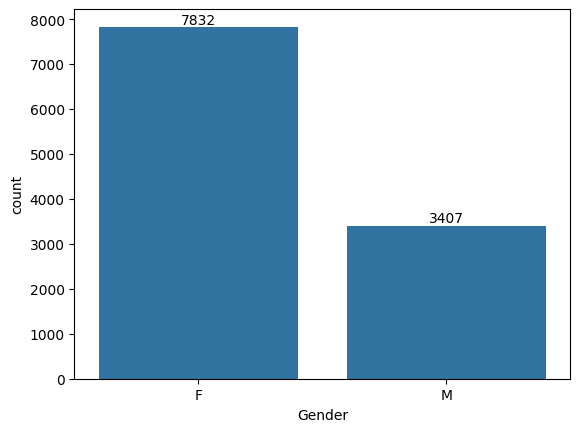

In [24]:
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

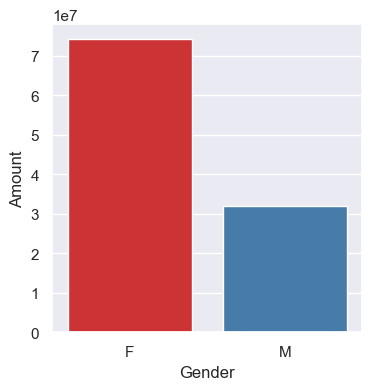

In [26]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(x='Gender',y='Amount',data=sales_gen,hue='Gender',dodge=False,palette='Set1',legend=False)

 *From both graphs we can see that females are purchasing more products than males with more purchasing power*

### By Age

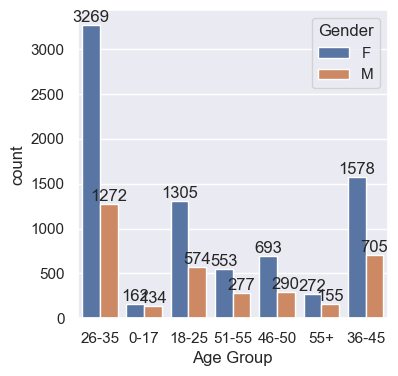

In [27]:
#Age group vs count

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Amount')

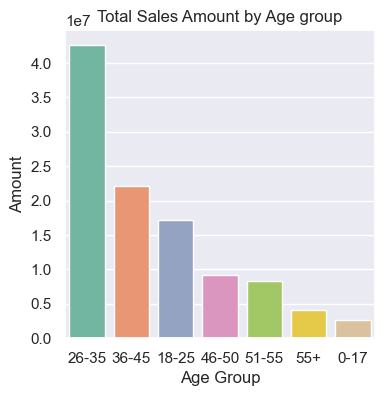

In [28]:
# According to amount

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue='Age Group',dodge=False,palette='Set2',legend=False)
ax.set_title('Total Sales Amount by Age group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Amount')

*From above graph it can be observed that most of the buyers are of age group 26-35*

### By States

Text(0, 0.5, 'Number of Orders')

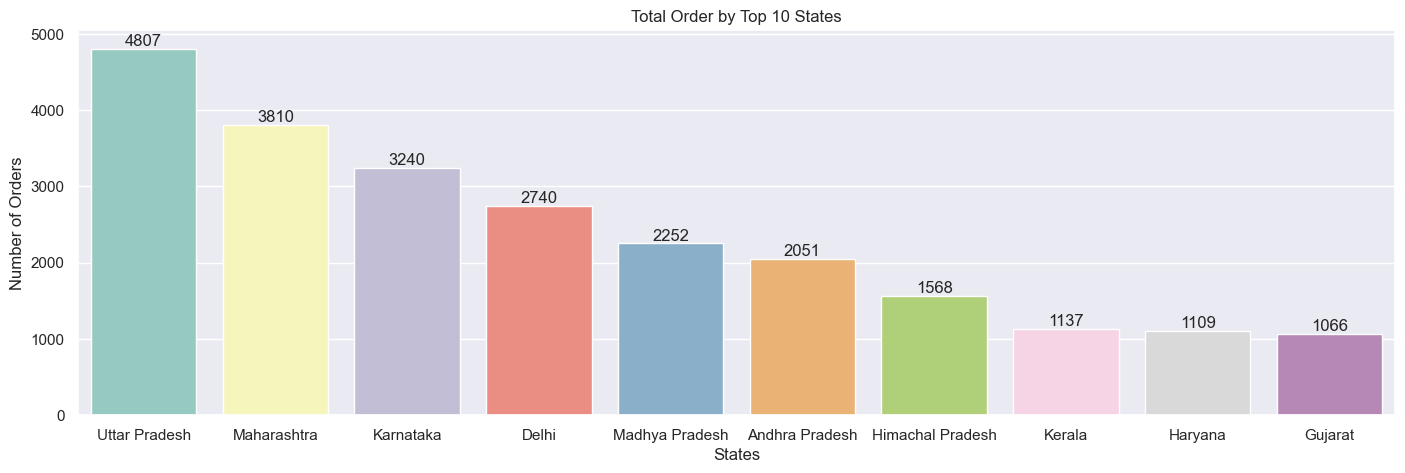

In [29]:
# Total no of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
ax=sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State',dodge=False,palette='Set3',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Total Order by Top 10 States')
ax.set_xlabel('States')
ax.set_ylabel('Number of Orders')

Text(25.0, 0.5, 'Total Sales Amount')

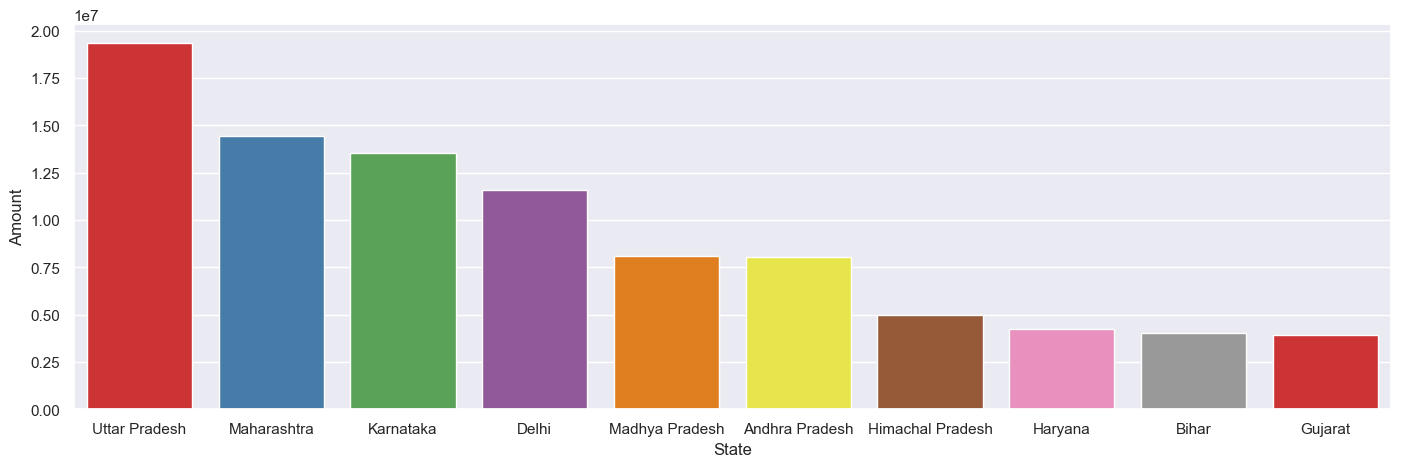

In [30]:
# Total Amount from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State',dodge=False,palette='Set1',legend=False)

ax.set_title('Total Sales Amount by Top 10 States')
ax.set_xlabel('States')
ax.set_ylabel('Total Sales Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

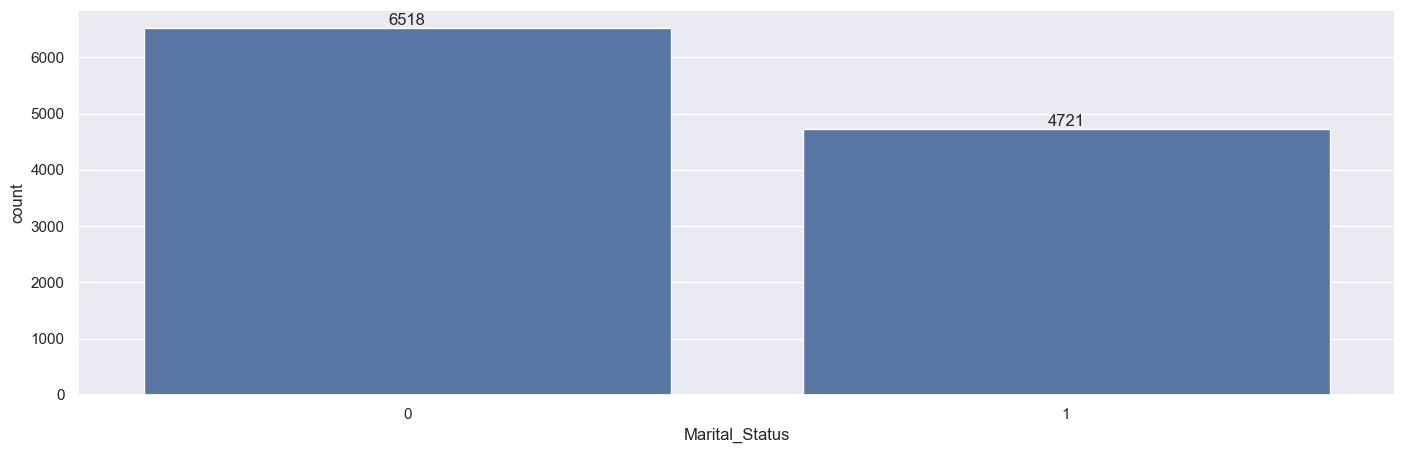

In [31]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,2)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

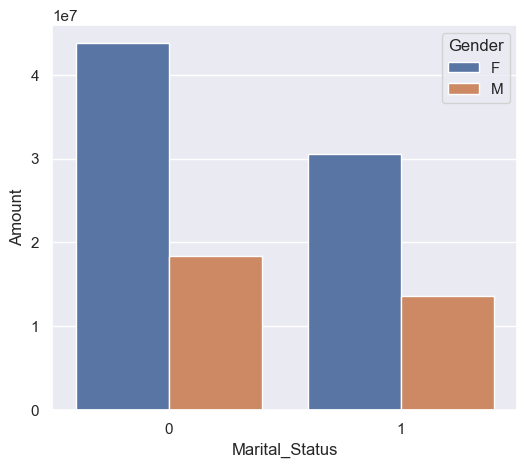

In [32]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*Most of the customers are married Womens (Married=0,Unmarried=1)*

### By Occupation

Text(0, 0.5, 'Number of Orders')

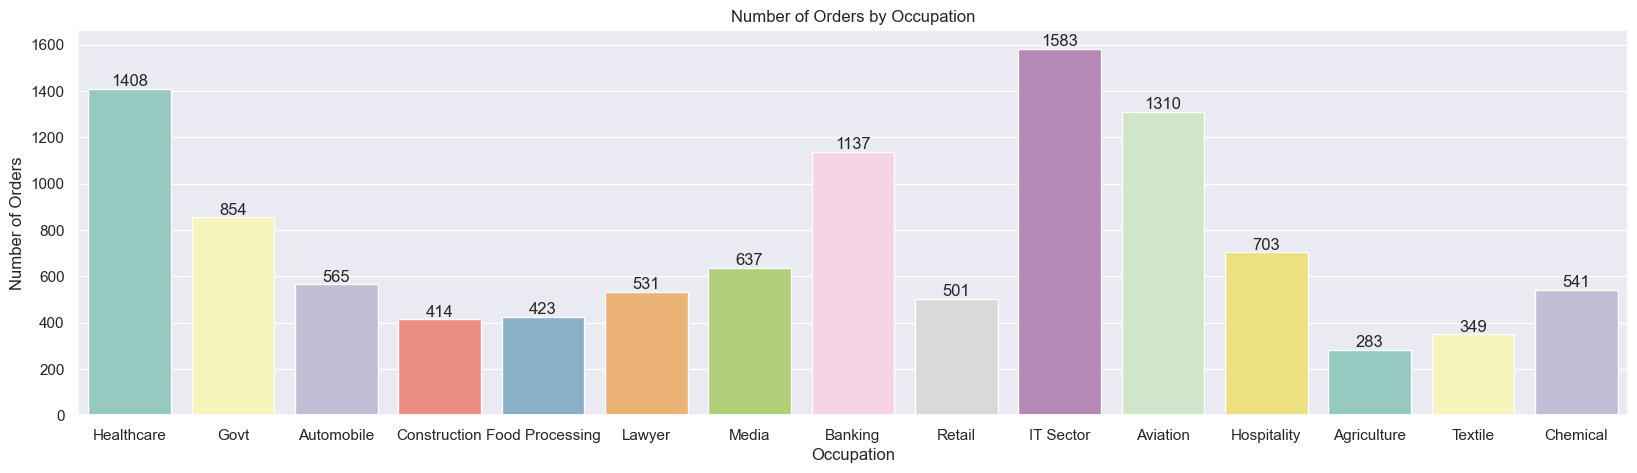

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation',dodge=False,palette='Set3',legend=False)

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Number of Orders by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Orders')

Text(0, 0.5, 'Total Sales')

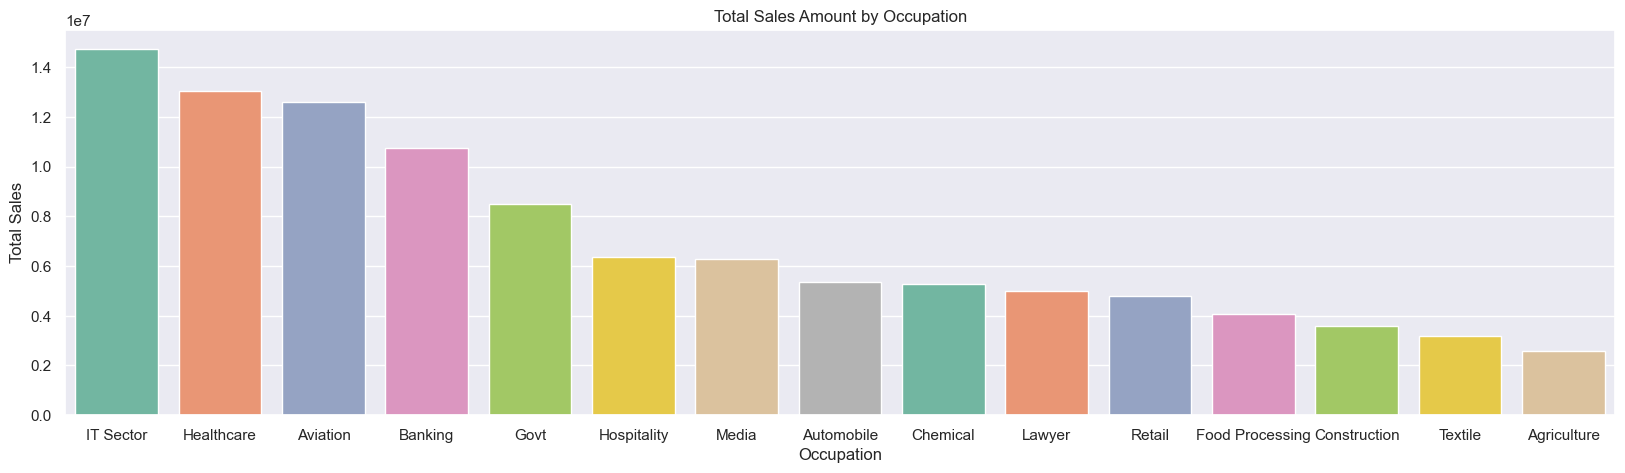

In [34]:
sales_Occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data = sales_Occ, x = 'Occupation',y= 'Amount',hue='Occupation',dodge=False,palette='Set2',legend=False)

ax.set_title('Total Sales Amount by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Total Sales')

*From above graphs most of the customers are from IT Sector,Healthcarfe and Aviation*

### By Product Category

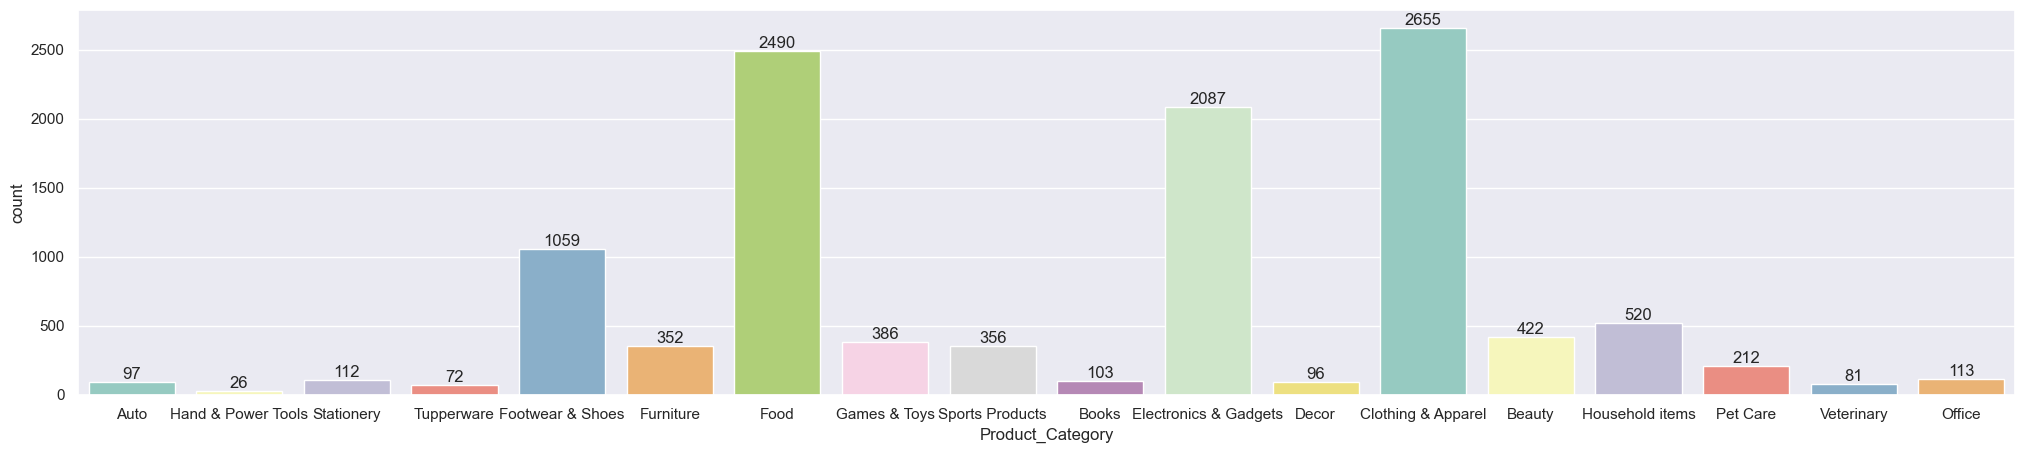

In [35]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category',dodge=False,palette='Set3',legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

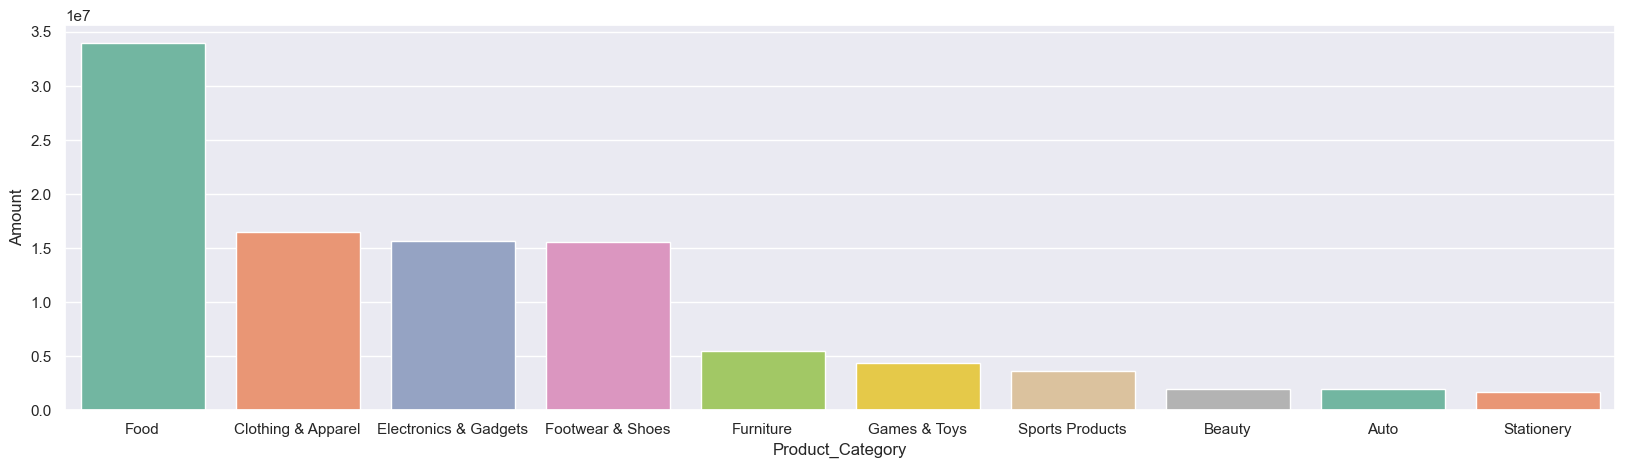

In [36]:
sales_cate = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_cate, x = 'Product_Category',y= 'Amount',hue='Product_Category',dodge=False,palette='Set2',legend=False)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

Text(0.5, 1.0, 'Top 10 Most sold product')

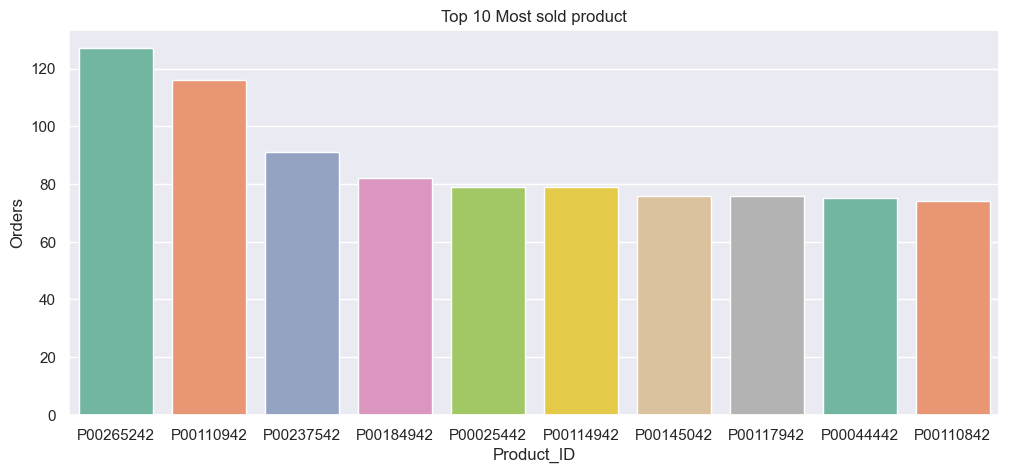

In [37]:
# Top 10 most sold products
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,5)})
ax=sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID',dodge=False,palette='Set2',legend=False)

ax.set_title('Top 10 Most sold product')

### Conclusion:

 *Gender Influence: Visuals show females, especially married ones, dominate in total spending—indicating key target segments.*

 *Top Occupations: Most purchases come from professionals in the IT, Healthcare, and Aviation sectors—these groups have higher purchasing power.*
 
 *Popular Product Categories: Graphs clearly highlight Food, Clothing, and Electronics as the top-selling categories. These should be prioritized for marketing and stock.*

 *Top Products: The top 10 products by order count reveal customer preferences—essential for inventory management and bundling strategies.*

 *Bundling Opportunities: Products with high co-purchase frequency (visible in product-based bar plots) suggest potential for combo deals or bundle discounts.*

 *Customer Demographics: Demographic visualizations confirm urban, working-class married women as the dominant customer base.*

# Github Link for Project

https://github.com/YashDumbhare25/Sales-Analysis-using-Python-